In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape, test.shape

((42000, 785), (28000, 784))

* Seperate out the labels from train data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
label = train.label
train.drop(labels=['label'], axis=1, inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


In [8]:
train.shape, label.shape

((42000, 784), (42000,))

In [9]:
train.shape
print(type(train))

<class 'pandas.core.frame.DataFrame'>


In [18]:
some_digit = train[1:2]
#some_digit = np.array(some_digit)
#some_digit[0][0]

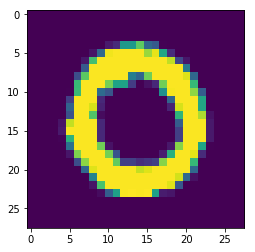

In [19]:
from matplotlib import pyplot as plt
def plot_digit(some_digit):
    some_digit = np.array(some_digit).reshape((28,28))
    plt.imshow(some_digit)
    plt.show()

plot_digit(some_digit)

* Split train data into train and test data. Since we do not want to touch actual test dataset

In [12]:
ratio = int(len(train)*0.8)
X_train, y_train = train[:ratio], label[:ratio]
X_test, y_test = train[ratio:], label[ratio:]

In [13]:
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((8400, 784), (8400,))


* Try KNN classifier with default setting

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier()
knn1.fit(X_train, y_train)
y_pred1 = knn1.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.969047619047619

In [22]:
predict_test_knn1 = knn1.predict(test)

In [46]:
submission_knn1 = pd.DataFrame(data=predict_test_knn1, columns=['Label'])
indx = [i for i in range(1,len(test)+1)]
submission_knn1['ImageId'] = indx

In [50]:
submission_knn1.to_csv('submission_knn1.csv',index=False)

###### above submission has accuracy of 0.96585

* Try KNN with optimal hyperparamter

In [16]:
# Not using grid search due to computing constraints. It has taken 3hrs and still running, so killed kernel.


#from sklearn.model_selection import GridSearchCV
#knn2 = KNeighborsClassifier()
#param_grid = {'n_neighbors': [3, 7, 15]}

#knn_optimal = GridSearchCV(knn2, param_grid=param_grid, cv=3, scoring="accuracy")
#knn_optimal.fit(X_train, y_train)

###### Try knn model with normalized data and see

In [51]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.fit_transform(X_test)

In [53]:
knn2 = KNeighborsClassifier()
knn2.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [54]:
pred2 = knn2.predict(X_test_scaled)
accuracy_score(y_test, pred2)

0.9429761904761905

In [55]:
pred2 = knn2.predict(standard_scaler.fit_transform(test))

In [57]:
submission_knn2 = pd.DataFrame(data=pred2, columns=['Label'])
indx = [i for i in range(1,len(test)+1)]
submission_knn2['ImageId'] = indx

In [59]:
submission_knn2.to_csv('submission_knn2.csv', index=False)

###### SGD classifier

In [60]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [63]:
sgd1 = SGDClassifier(random_state=42)
cross_val_score(sgd1, X_train, y_train, cv=3)

/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ravi/anaconda3

array([0.86334018, 0.86400571, 0.85175924])

###### SVM Classifier

In [64]:
from sklearn.svm import SVC
svm1 = SVC()

In [ ]:
cross_val_score(svm1, X_train, y_train, cv=3)